In [1]:
from random import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
sys.path.insert(0, '../Aaron/DataAug')
sys.path.insert(0, '../Aaron/Filters')
import speckle
import median

In [2]:
train = pd.read_json("../../train.json")

In [3]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate((x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]), axis = 3)
x_band1.shape

(1604, 75, 75)

In [4]:
X_train.shape

(1604, 75, 75, 2)

In [5]:
orgimg = x_band1[0]

In [6]:
newimg = median.median_filter(orgimg)

In [7]:
from scipy.stats import expon
r = expon.rvs(size=1000)

In [8]:
def speckle_noise(img):
    row,col = img.shape
    r = expon.rvs(size= (row*col))
    r = r.reshape(row,col)        
    noisy = img + np.log(r)
    return noisy

In [9]:
speckimg = speckle_noise(newimg)

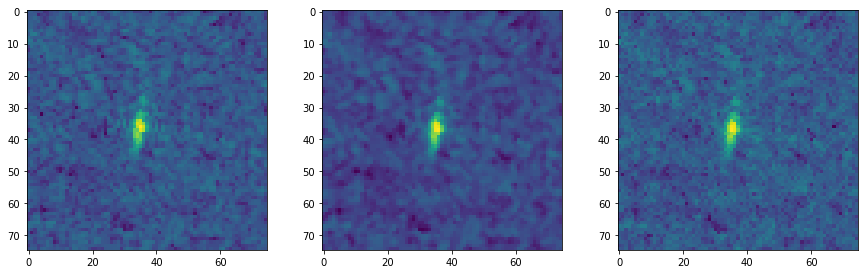

In [10]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(3,3,1)
ax.imshow(orgimg)
ax = fig.add_subplot(3,3,2)
ax.imshow(newimg)
ax = fig.add_subplot(3,3,3)
ax.imshow(speckimg)
plt.show()

In [14]:
np.mean(speckimg - orgimg)

-0.50161898110457603

In [15]:
np.mean(speckimg - newimg)

-0.56554479141780079